In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import random

In [144]:
archive = pd.read_csv('./data/train_B_text.csv')
df_copy = pd.DataFrame(archive)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3497 entries, 0 to 3496
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         3497 non-null   int64 
 1   Title      3497 non-null   object
 2   Fake/Real  3497 non-null   object
dtypes: int64(1), object(2)
memory usage: 82.1+ KB


In [145]:
# Function to generate fake headlines
def generate_fake_headline():
    # You can use text generation techniques here
    # For simplicity, let's generate fake headlines using templates and fillers
    templates = [
        "Study finds that {noun} {verb} {adjective} {noun2}",
        "New {noun} discovered in {place}",
        "{Number} of {professionals} believe {outrageous_claim}",
        "Experts warn of {adjective} {noun} epidemic",
        "Breaking: {number} {noun} {verb} {place}",
        "Scientists develop {adjective} {noun} to solve {global_issue}",
        "{Celebrity} spotted {verb_ing} in {unexpected_place}"
    ]
    
    fillers = {
        'noun': ['aliens', 'unicorns', 'robots', 'dinosaurs', 'dragons'],
        'verb': ['discovered', 'confirm', 'prove', 'debunk', 'predict'],
        'adjective': ['new', 'ancient', 'mysterious', 'dangerous', 'magical'],
        'noun2': ['species', 'planet', 'phenomenon', 'artifact', 'creature'],
        'unexpected_place': ['the Amazon rainforest', 'Mars', 'the Bermuda Triangle', 'Atlantis', 'a parallel universe'],
        'place':['sea','Room 56', 'university','main square','beach', 'Barcelona'],
        'Number': ['90', '80', '70', '60', '50'],
        'professionals': ['scientists', 'doctors', 'experts', 'researchers', 'analysts'],
        'outrageous_claim': ['the Earth is flat', 'aliens are among us', 'chocolate cures all diseases', 'time travel is possible'],
        'number': ['Breaking News', 'Exclusive', 'Shocking Report', 'Urgent Update', 'Important Announcement'],
        'Celebrity': ['Elon Musk', 'Beyoncé', 'Barack Obama', 'Taylor Swift', 'Keanu Reeves'],
        'verb_ing': ['skydiving', 'cooking', 'singing', 'dancing', 'sleeping'],
        'global_issue': ['climate change', 'world hunger', 'poverty', 'pandemic', 'terrorism']
    }
    
    template = random.choice(templates)
    headline = template.format(**{key: random.choice(fillers[key]) for key in fillers})
    
    return headline

# Generate 1000 fake headlines
fake_headlines = [generate_fake_headline() for _ in range(2000)]

# Create DataFrame with fake headlines and 'Fake' label
df_fake = pd.DataFrame({
    'Title': fake_headlines,
    'Fake/Real': ['fake'] * len(fake_headlines)
})

# Concatenate the existing dataset with the fake headlines dataset
combined_dataset = pd.concat([df_copy, df_fake], ignore_index=True)

print(combined_dataset)

       Id                                              Title Fake/Real
0     0.0  "Humanitarian Aid: Volunteers Bring Relief to ...      fake
1     1.0  Vegan, Low-Carbohydrate Eco-Atkins Diet could ...      real
2     2.0  Fannie, Freddie Score Win Against Conn. Cities...      real
3     3.0  'Bachelorette' star Andi Dorfman quits job as ...      real
4     4.0     Deconstructing the FCC's Net Neutrality Ruling      real
...   ...                                                ...       ...
5492  NaN          90 of experts believe aliens are among us      fake
5493  NaN                Experts warn of new aliens epidemic      fake
5494  NaN           Study finds that robots prove new planet      fake
5495  NaN  Study finds that aliens debunk magical phenomenon      fake
5496  NaN          Experts warn of dangerous aliens epidemic      fake

[5497 rows x 3 columns]


In [146]:
df_copy = combined_dataset.drop(['Id'], axis=1)

print(df_copy)

                                                  Title Fake/Real
0     "Humanitarian Aid: Volunteers Bring Relief to ...      fake
1     Vegan, Low-Carbohydrate Eco-Atkins Diet could ...      real
2     Fannie, Freddie Score Win Against Conn. Cities...      real
3     'Bachelorette' star Andi Dorfman quits job as ...      real
4        Deconstructing the FCC's Net Neutrality Ruling      real
...                                                 ...       ...
5492          90 of experts believe aliens are among us      fake
5493                Experts warn of new aliens epidemic      fake
5494           Study finds that robots prove new planet      fake
5495  Study finds that aliens debunk magical phenomenon      fake
5496          Experts warn of dangerous aliens epidemic      fake

[5497 rows x 2 columns]


([<matplotlib.patches.Wedge at 0x1574cbb6110>,
 [Text(-0.031114518489900597, 1.0995598604619676, 'real'),
  Text(0.031114415541676446, -1.0995598633751142, 'fake')],
 [Text(-0.01697155553994578, 0.599759923888346, '50.9%'),
  Text(0.01697149938636897, -0.599759925477335, '49.1%')])

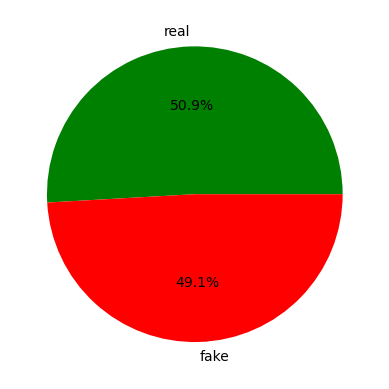

In [147]:
Real = df_copy['Fake/Real'].value_counts()
plt.pie(Real, labels=Real.index,  autopct='%1.1f%%',colors=['green', 'red'])

Y ahora debería partir este dataset aleatoriamente a fin de obtener los TRAIN y los VALIDATION.

Luego evalúo con el TEST


In [148]:
real_archive = pd.read_csv('./data/test_B_text.csv')
df_real_copy = pd.DataFrame(real_archive)
df_real_copy.info()
df_real_copy = df_real_copy.drop([ 'Id'], axis=1)

real_data = np.asarray(df_real_copy)
flat_real_data = real_data.flatten()

flat_real_data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      1500 non-null   int64 
 1   Title   1500 non-null   object
dtypes: int64(1), object(1)
memory usage: 23.6+ KB


array(["Roche's cobas HPV Test gets FDA approval for first-line primary screening for  ...",
       'Security on High Alert at Final Four Events',
       'Computer simulation shows how our universe grew up', ...,
       'Moto E Makes an Appearance via Leaked Image; Flipkart Teases India Launch',
       'Buried Fossil Soils Found To Be Rich In Carbon',
       'Mayor seeks Brooks concert solution'], dtype=object)

In [149]:
data = np.asarray(df_copy)
x = data[:,:-1]
x_flat = x.flatten()
y = data[:,-1]
df_copy.head
print(x_flat)
print(y)

['"Humanitarian Aid: Volunteers Bring Relief to Disaster-Hit Communities"'
 'Vegan, Low-Carbohydrate Eco-Atkins Diet could Reduce Heart Disease Risk'
 'Fannie, Freddie Score Win Against Conn. Cities In Tax Row' ...
 'Study finds that robots prove new planet'
 'Study finds that aliens debunk magical phenomenon'
 'Experts warn of dangerous aliens epidemic']
['fake' 'real' 'real' ... 'fake' 'fake' 'fake']


In [150]:

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

import string

def preprocessing_algorithm(input_array):
    # Text preprocessing
    processed_text = []
    for text in input_array:
        # Tokenization
        tokenized_text = word_tokenize(text.lower())
        
        # Remove punctuation
        table = str.maketrans('', '', string.punctuation)
        tokenized_text_no_punct = [word.translate(table) for word in tokenized_text]
        
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        filtered_text = [word for word in tokenized_text_no_punct if word not in stop_words]
        
        # Join tokens back into a string
        processed_text.append(' '.join(filtered_text))
    return processed_text





[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\irene\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\irene\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [151]:
# TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
processed_text= preprocessing_algorithm(x_flat)
processed_real_text = preprocessing_algorithm(flat_real_data)
combined = processed_text + processed_real_text 

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorized = tfidf_vectorizer.fit(combined)
tfidf_vectorized_f = tfidf_vectorizer.transform(processed_text)
vectorized_real_data = tfidf_vectorizer.transform(processed_real_text)



In [152]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

from sklearn.naive_bayes import BernoulliNB,  MultinomialNB

clf = BernoulliNB()  #82% 
#clf = MultinomialNB() #81%
#clf  = LogisticRegression(max_iter=1000) # max un 80%

# Split into training and testing
X_train,X_test,y_train,y_test = train_test_split(tfidf_vectorized_f,y,train_size=0.8,random_state=43)

# Train the classifier
clf.fit(X_train, y_train)

# Evaluate results
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)
#print("Classification Report:")
#print(classification_report(y_test, y_pred))



Accuracy: 0.8536363636363636


In [154]:
predictions = clf.predict(vectorized_real_data)
import zipfile

df_real_final = pd.DataFrame(real_archive)
df_real_final['Fake/Real'] = predictions
print(df_real_final)
# Save the DataFrame to a CSV file
csv_filename = 'final_predictions.csv'
df_real_final.to_csv(csv_filename, index=False)

# Compress the CSV file into a zip archive
zip_filename = 'final_predictions.zip'

with zipfile.ZipFile(zip_filename, 'w') as zipf:
    zipf.write(csv_filename, arcname='final_predictions.csv')

# Calculate statistics
num_true = sum(predictions == 'real')
num_false = sum(predictions == 'fake')
total_headlines = len(predictions)

# Print the predictions and statistics

print("\nStatistics:")
print(f"Number of true headlines: {num_true/total_headlines}")
print(f"Number of false headlines: {num_false/total_headlines}")

        Id                                              Title Fake/Real
0        0  Roche's cobas HPV Test gets FDA approval for f...      real
1        1        Security on High Alert at Final Four Events      real
2        2  Computer simulation shows how our universe gre...      fake
3        3    DREW BARRYMORE Welcomes Second Daughter Frankie      real
4        4  Time Warner and Comcast FCC filing hints at ne...      real
...    ...                                                ...       ...
1495  1495    European recovery set to boost emerging markets      real
1496  1496  The Hanson Brothers Are All Grown Up and Have ...      real
1497  1497  Moto E Makes an Appearance via Leaked Image; F...      real
1498  1498     Buried Fossil Soils Found To Be Rich In Carbon      real
1499  1499                Mayor seeks Brooks concert solution      real

[1500 rows x 3 columns]

Statistics:
Number of true headlines: 0.858
Number of false headlines: 0.142
